# **Import Libraries**

In [1]:
# Checking data
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

# Visualization
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from statsmodels.graphics.gofplots import qqplot

# Ignore Warning
import warnings

### **Set Up Libraries**

In [2]:
warnings.simplefilter('ignore')

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 25)

# **Data Collection**

In [3]:
data = pd.read_csv("data_umkm_bentuk_usaha.csv") # load data

data_copy = data.copy(deep=True)

# **Data Preprocessing**

In [4]:
data # cek Keseluruhan Data

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bentuk_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,PERORANGAN,78,UNIT,2020
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,CV,173,UNIT,2020
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,PT,33,UNIT,2020
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,KOPERASI,0,UNIT,2020
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PERORANGAN,49,UNIT,2020
...,...,...,...,...,...,...,...,...,...
103,104,32,JAWA BARAT,3278,KOTA TASIKMALAYA,KOPERASI,1,UNIT,2020
104,105,32,JAWA BARAT,3279,KOTA BANJAR,PERORANGAN,34,UNIT,2020
105,106,32,JAWA BARAT,3279,KOTA BANJAR,CV,99,UNIT,2020
106,107,32,JAWA BARAT,3279,KOTA BANJAR,PT,7,UNIT,2020


In [5]:
data.isnull().mean().to_frame() # cek missing data

,0
id,0.0
kode_provinsi,0.0
nama_provinsi,0.0
kode_kabupaten_kota,0.0
nama_kabupaten_kota,0.0
bentuk_usaha,0.0
jumlah_umkm,0.0
satuan,0.0
tahun,0.0


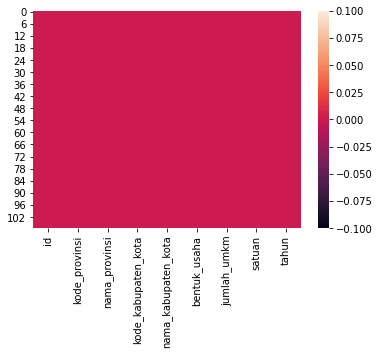

In [6]:
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.dtypes.to_frame() # cek type data

,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kode_kabupaten_kota,int64
nama_kabupaten_kota,object
bentuk_usaha,object
jumlah_umkm,int64
satuan,object
tahun,int64


In [8]:
data.info() # getting information bout the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   108 non-null    int64 
 1   kode_provinsi        108 non-null    int64 
 2   nama_provinsi        108 non-null    object
 3   kode_kabupaten_kota  108 non-null    int64 
 4   nama_kabupaten_kota  108 non-null    object
 5   bentuk_usaha         108 non-null    object
 6   jumlah_umkm          108 non-null    int64 
 7   satuan               108 non-null    object
 8   tahun                108 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 7.7+ KB


In [9]:
data.describe() # cek statistical measure

,id,kode_provinsi,kode_kabupaten_kota,jumlah_umkm,tahun
count,108.00000,108.0,108.000000,108.000000,108.0
mean,54.50000,32.0,3231.333333,51.055556,2020.0
std,31.32092,0.0,31.347316,64.101531,0.0
min,1.00000,32.0,3201.000000,0.000000,2020.0
25%,27.75000,32.0,3207.000000,2.000000,2020.0
50%,54.50000,32.0,3214.000000,24.000000,2020.0
75%,81.25000,32.0,3273.000000,83.250000,2020.0
max,108.00000,32.0,3279.000000,335.000000,2020.0


In [10]:
data.describe(include='all') # cek statistical measure

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bentuk_usaha,jumlah_umkm,satuan,tahun
count,108.00000,108.0,108,108.000000,108,108,108.000000,108,108.0
unique,NaN,NaN,1,NaN,27,4,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,NaN,KABUPATEN PANGANDARAN,CV,NaN,UNIT,NaN
freq,NaN,NaN,108,NaN,4,27,NaN,108,NaN
mean,54.50000,32.0,NaN,3231.333333,NaN,NaN,51.055556,NaN,2020.0
std,31.32092,0.0,NaN,31.347316,NaN,NaN,64.101531,NaN,0.0
min,1.00000,32.0,NaN,3201.000000,NaN,NaN,0.000000,NaN,2020.0
25%,27.75000,32.0,NaN,3207.000000,NaN,NaN,2.000000,NaN,2020.0
50%,54.50000,32.0,NaN,3214.000000,NaN,NaN,24.000000,NaN,2020.0
75%,81.25000,32.0,NaN,3273.000000,NaN,NaN,83.250000,NaN,2020.0


# **Data Analysis**

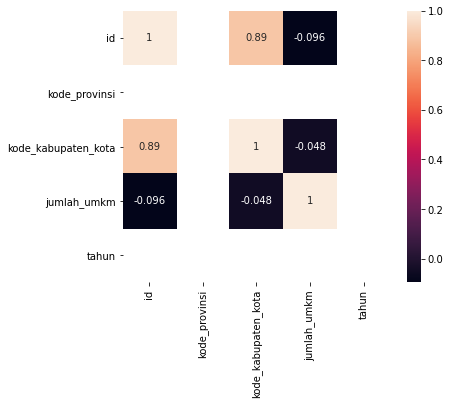

In [11]:
# correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

# **Univariate Analysis**

### **Apa bentuk distribusi dari Jumlah UMKM?**

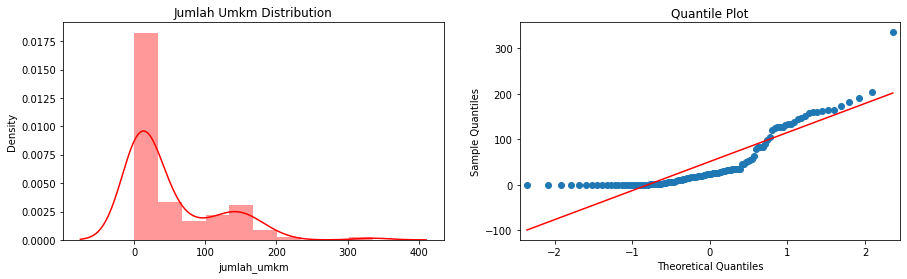

In [12]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['jumlah_umkm'], 
    ax=ax1 , 
    color ='red'
)

ax1.set(title='Jumlah Umkm Distribution')

qqplot(
    data['jumlah_umkm'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya adalah **Skewed Right**.

### **Apa bentuk distribusi dari Kode Kabupaten dan Kota?**

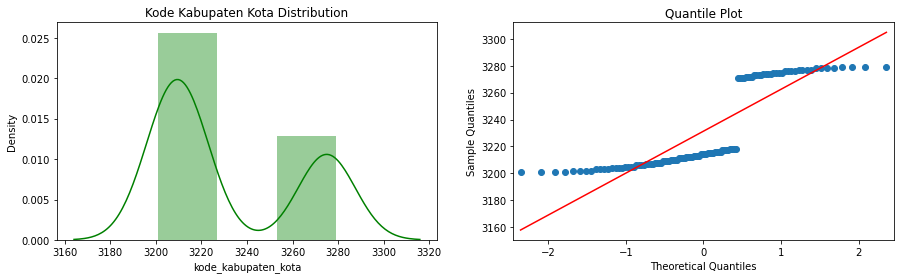

In [13]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_kabupaten_kota'], 
    ax=ax1 , 
    color ='green'
)

ax1.set(title='Kode Kabupaten Kota Distribution')

qqplot(
    data['kode_kabupaten_kota'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya adalah **Skewed Right**.

### **Apa bentuk distribusi dari Kode Provinsi?**

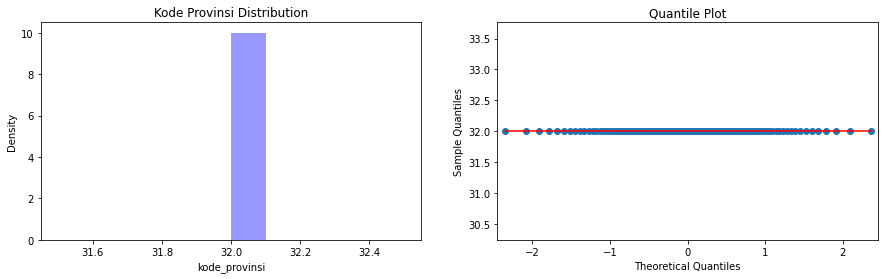

In [14]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['kode_provinsi'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Kode Provinsi Distribution')

qqplot(
    data['kode_provinsi'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya adalah **Normal Distribution**.

### **Apa bentuk distribusi dari Tahun?**

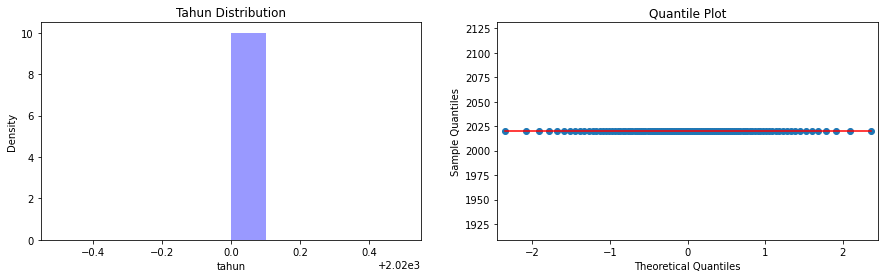

In [15]:
# checking and visualizing the type of distribution of a feature column
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    figsize=(15,4)
)

sns.distplot(
    data['tahun'], 
    ax=ax1 , 
    color ='blue'
)

ax1.set(title='Tahun Distribution')

qqplot(
    data['tahun'], 
    ax=ax2, 
    line='s'
)

ax2.set(title='Quantile Plot')

plt.show()

> Bentuk distribusinya adalah **Normal Distribution**.

In [16]:
# checking skewness value 
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed

skew_value = data.skew().sort_values(ascending=False)
skew_value

jumlah_umkm            1.569761
kode_kabupaten_kota    0.665418
id                     0.000000
kode_provinsi          0.000000
tahun                  0.000000
dtype: float64

# **Bivariate Analysis**

### **Function**

In [17]:
def bivariate_visualization_bar(data, x, y, color):
    
    """
    Returning Bar Plot Visualization
    for bivariate analysis
    
    data = data
    x = x axis
    y = y axis
    color = color/hue
    title = 'put your title here'
    
    """
    
    fig = px.bar(
        data,
        x=x,
        y=y,
        color=color
    )
    
    return fig.show()

def bivariate_visualization_pie(data, names, title, hole, template='gridon'):
    
    """
    Returning Pie Plot Visualization
    for bivariate analysis
    
    data = data
    names = names
    hole = hole (0.5 / 0,4)
    title = 'put your title here'
    template = template (default 'gridon')
    
    """
    
    fig = px.pie(
        data,
        names=names,
        hole=hole,
        title=title,
        template=template
    )
    
    return fig.show()

def bivariate_visualization_scatter(data, y, x, color, title, template='plotly_dark', trendline='ols'):
    
    """
    Returning Scatter Visualization
    for bivariate analysis
    
    data = data
    y = y axis
    x = x axis
    color = color/hue
    template = template (default 'plotly_dark')
    trendline = trendline (default 'ols')
    
    """
    
    fig = px.scatter(
        data,
        y=y,
        x=x,
        color=color,
        title=title,
        template=template,
        trendline=trendline
    )

    return fig.show()

## **Visualization**

### **Bentuk Usaha manakah yang memiliki Jumlah UMKM terbanyak?**

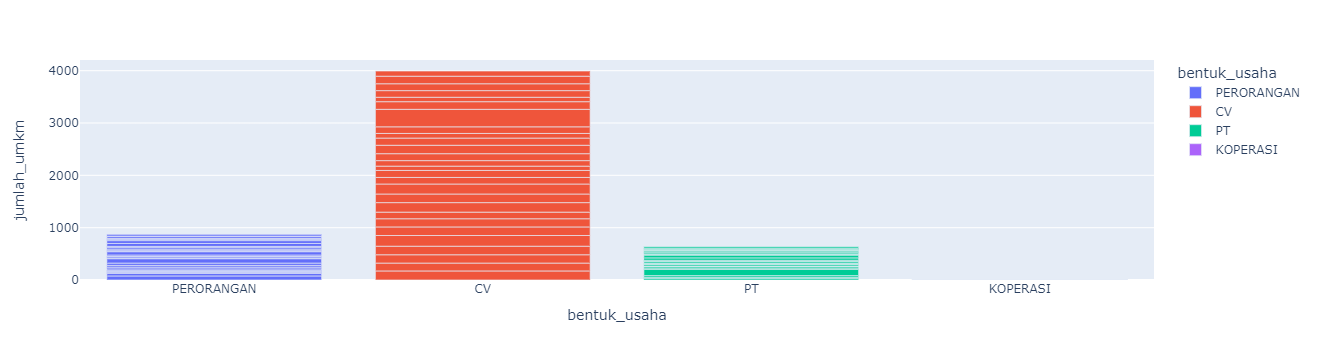

In [18]:
bivariate_visualization_bar(
    data=data,
    x=data['bentuk_usaha'],
    y=data['jumlah_umkm'],
    color=data['bentuk_usaha']
)

> **Bentuk Usaha** yang memiliki **Jumlah UMKM* terbanyak adalah **Bentuk Usaha CV**.

### **Bentuk Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Nama Kabupaten dan Kota?**

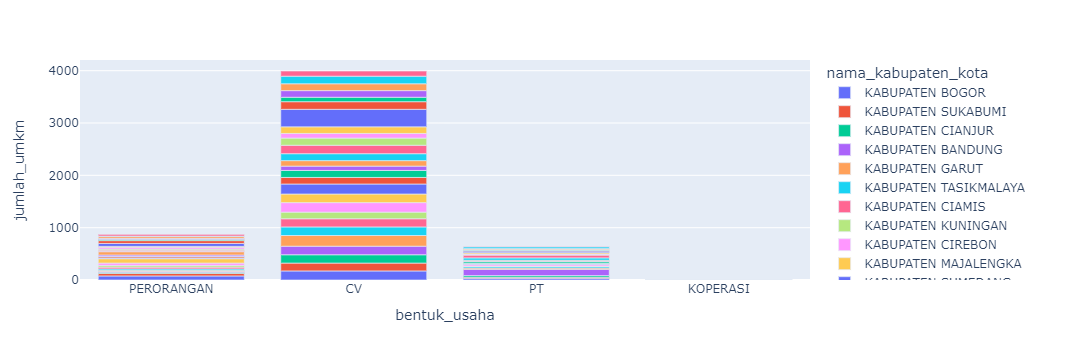

In [19]:
bivariate_visualization_bar(
    data=data,
    x=data['bentuk_usaha'],
    y=data['jumlah_umkm'],
    color=data['nama_kabupaten_kota']
)

> **Bentuk Usaha** dan **Jumlah UMKM** terbanyak dari setiap **Kabupaten dan Kota** adalah **Bentuk Usaha** **CV**.

### **Bentuk Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Provinsi?**

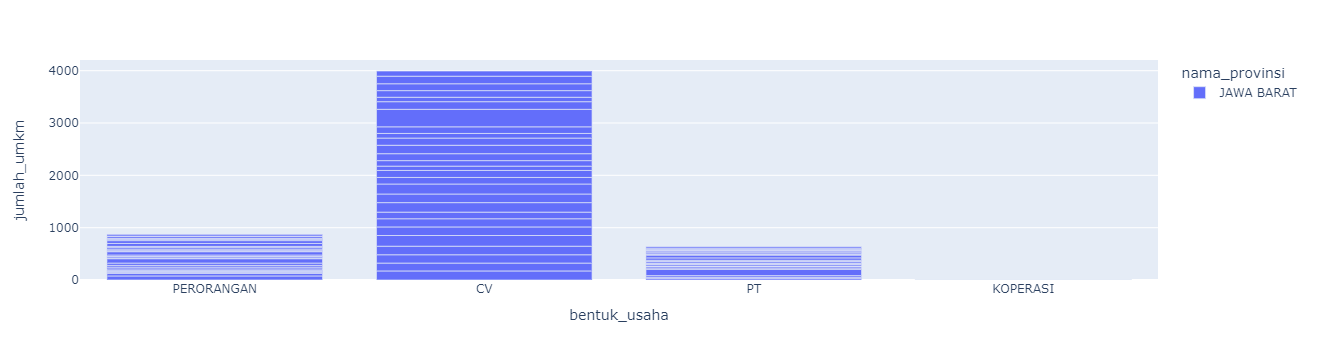

In [20]:
bivariate_visualization_bar(
    data=data,
    x=data['bentuk_usaha'],
    y=data['jumlah_umkm'],
    color=data['nama_provinsi']
)

> **Bentuk Usaha** dan Jumlah UMKM terbanyak ialah **Bentuk Usaha** **CV**, dan dominan berasal dari Provinsi **Jawa Barat**.

### **Bentuk Usaha dan Jumlah UMKM manakah yang terbanyak dari setiap Satuan?**

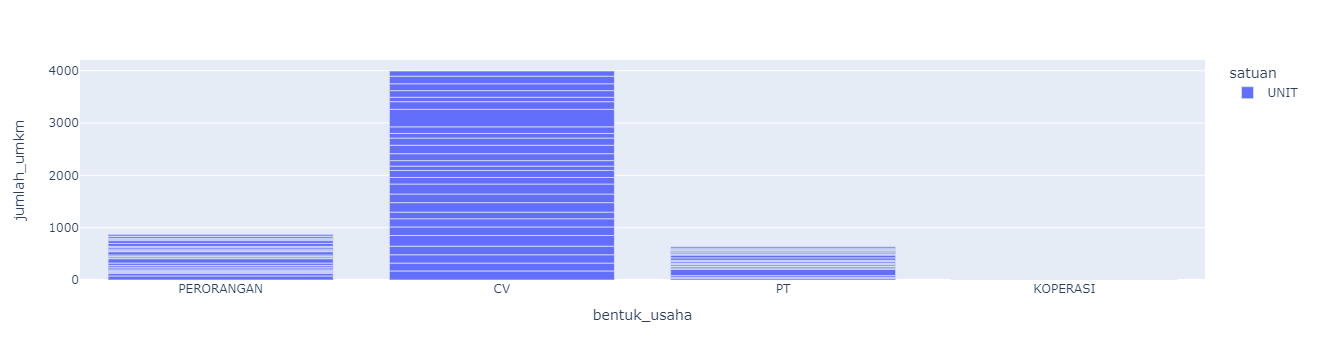

In [21]:
bivariate_visualization_bar(
    data=data,
    x=data['bentuk_usaha'],
    y=data['jumlah_umkm'],
    color=data['satuan']
)

> **Jenis Usaha** dan **Jumlah UMKM** dominan satuannya adalah **Unit**.

### **Bentuk Usaha manakah yang memiliki Jumlah UMKM terbanyak?**

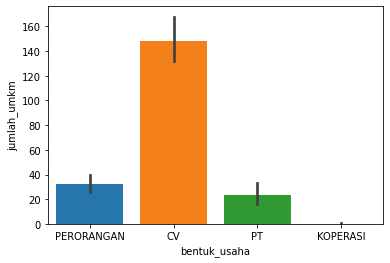

In [22]:
sns.barplot(
    x='bentuk_usaha', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

plt.show()

> **Bentuk Usaha** CV memiliki **Jumlah UMKM** terbanyak.

### **Nama Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak?**

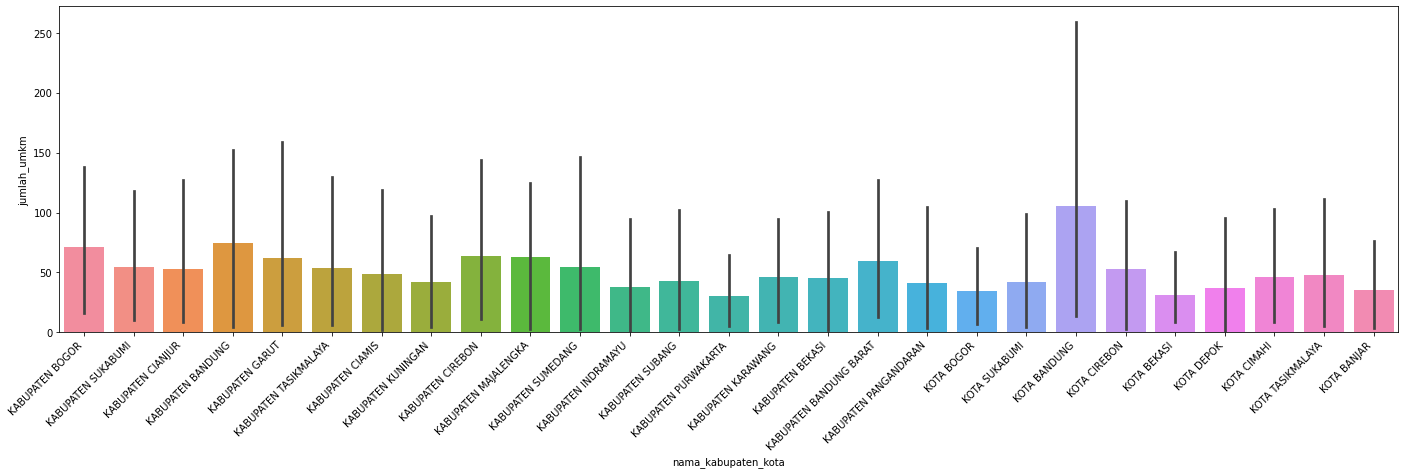

In [23]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=data,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

> **Kota Bandung** memiliki **Jumlah UMKM** terbanyak.

### **Berapa persen frekuensi kemunculan Bentuk Usaha dalam data?**

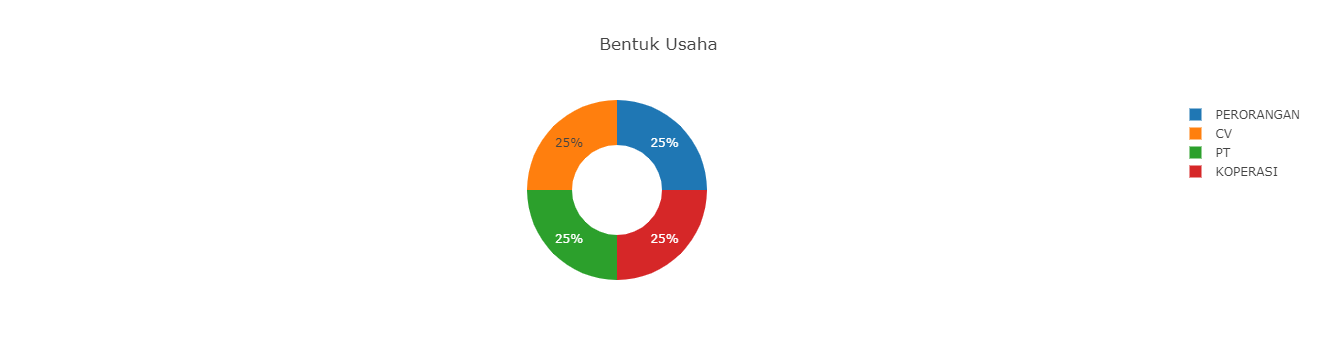

In [24]:
bivariate_visualization_pie(
    data=data,
    names='bentuk_usaha',
    title='Bentuk Usaha',
    hole=0.5
)

> Frekuensi kemunculan **Bentuk Usaha** sama, yaitu 25%.

### **Berapa persen frekuensi kemunculan Nama Kabupaten dan Kota dalam data?**

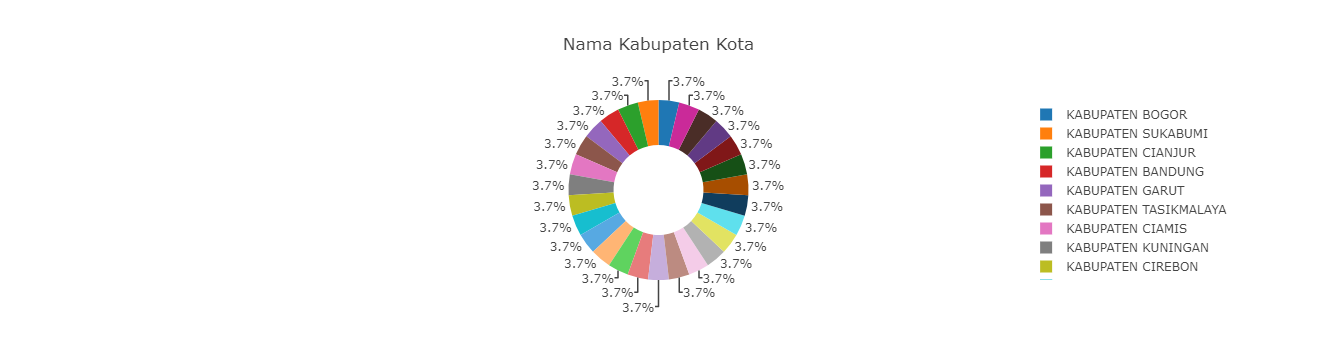

In [25]:
bivariate_visualization_pie(
    data=data,
    names='nama_kabupaten_kota',
    title='Nama Kabupaten Kota',
    hole=0.5
)

> Frekuensi Kemunculan Nama **Kabupaten dan Kota** sama, yaitu 3.7%.

### **Berapa persen frekuensi kemunculan Nama Provinsi dalam data?**

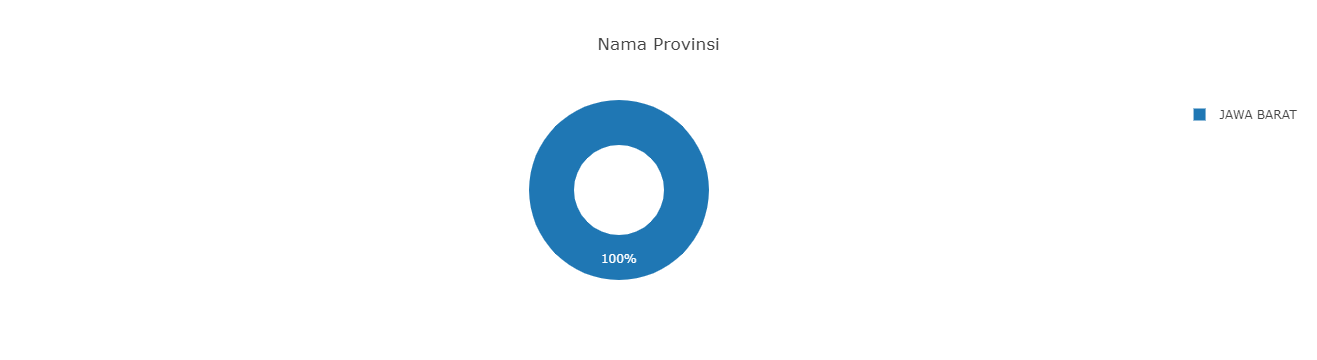

In [26]:
bivariate_visualization_pie(
    data=data,
    names='nama_provinsi',
    title='Nama Provinsi',
    hole=0.5
)

> Frekuensi kemunculan Provinsi **Jawa Barat** adalah 100%.

### **Berapa persen frekuensi kemunculan Satuan Unit dalam data?**

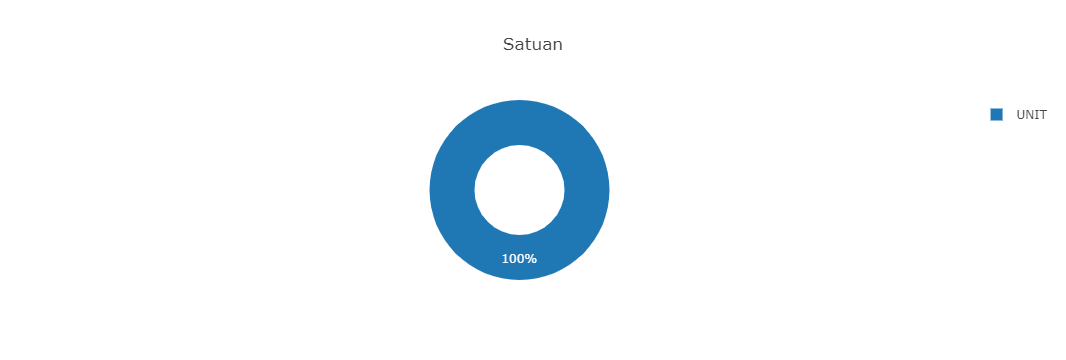

In [27]:
bivariate_visualization_pie(
    data=data,
    names='satuan',
    title='Satuan',
    hole=0.5
)

> Frekuensi kemunculan Satuan **UNIT** adalah 100%.

### **Bentuk Usaha manakah yang memiliki Jumlah UMKM terbanyak?**

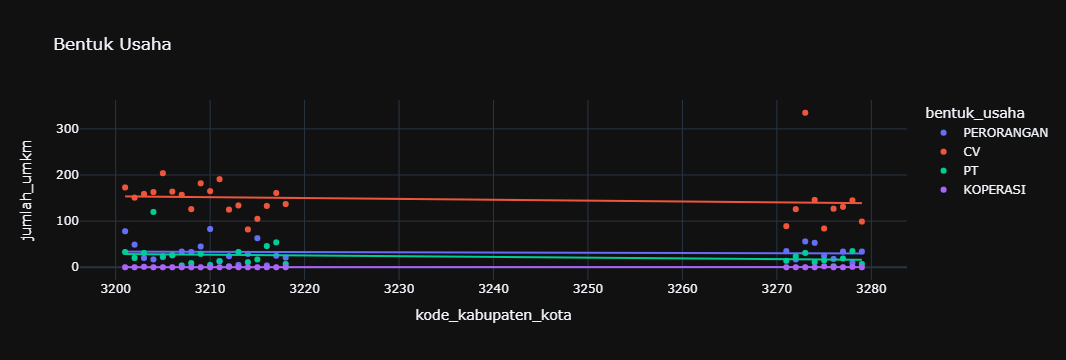

In [28]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='bentuk_usaha',
    title='Bentuk Usaha'
)

> **CV** memiliki **Jumlah UMKM** terbanyak.

### **Kabupaten dan Kota manakah yang memiliki Jumlah UMKM terbanyak?**

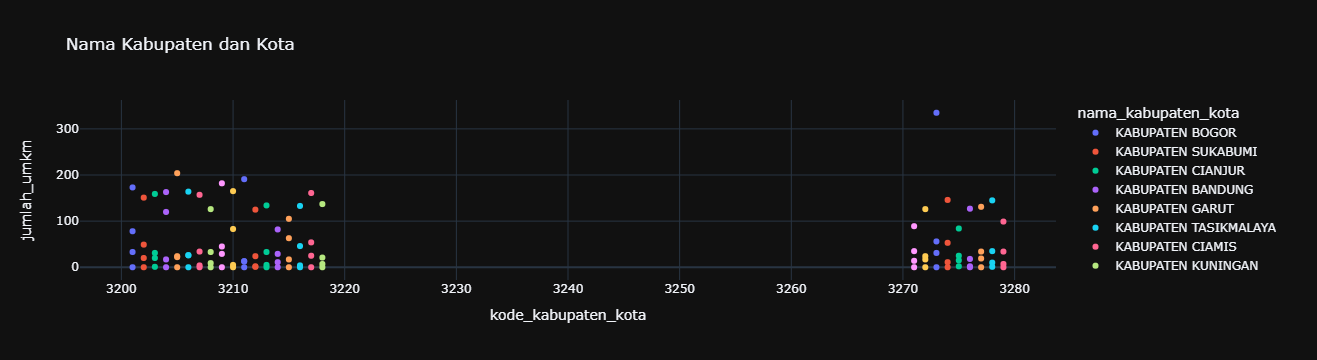

In [29]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> **Kota Bandung** memiliki **Jumlah UMKM** terbanyak.

### **Dari Provinsi manakah yang memiliki jumlah UMKM terbanyak?**

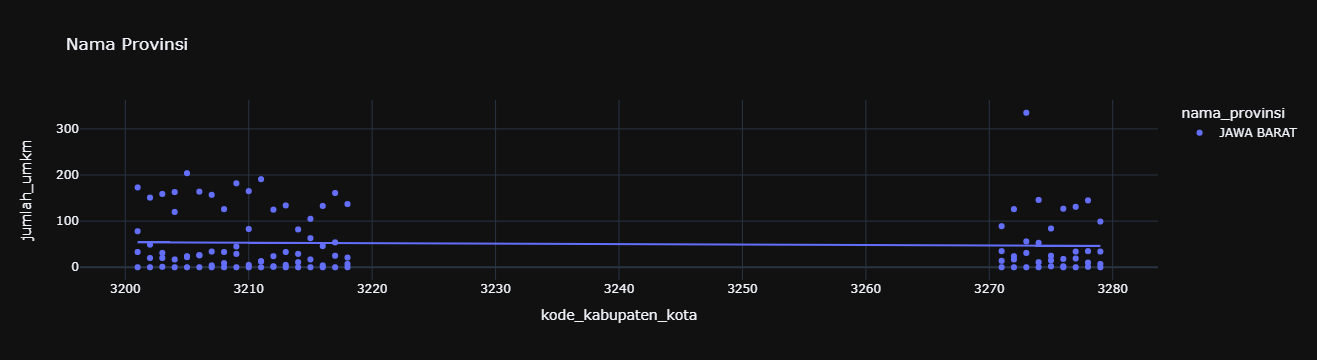

In [30]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_provinsi',
    title='Nama Provinsi'
)

> Provinsi **Jawa Barat** memiliki Jumlah UMKM terbanyak.

### **Dari satuan manakah yang memiliki jumlah UMKM terbanyak?**

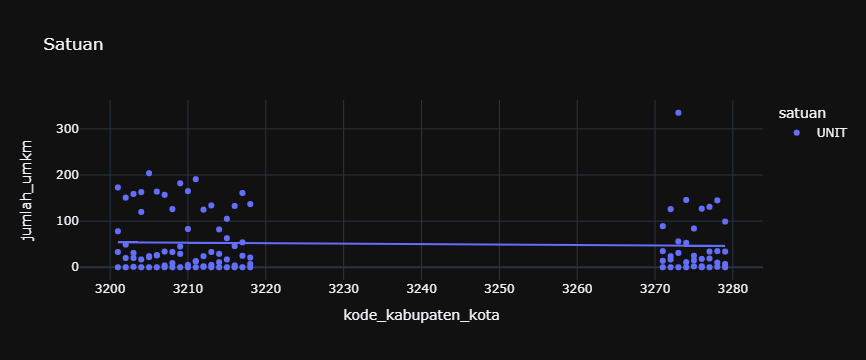

In [31]:
bivariate_visualization_scatter(
    data=data,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='satuan',
    title='Satuan'
)

> Satuan yang memiliki **Jumlah UMKM** terbanyak adalah satuan **UNIT**.

# **Multivariate Analysis**

### **Bentuk usaha dalam Visualisasi Multivariate**

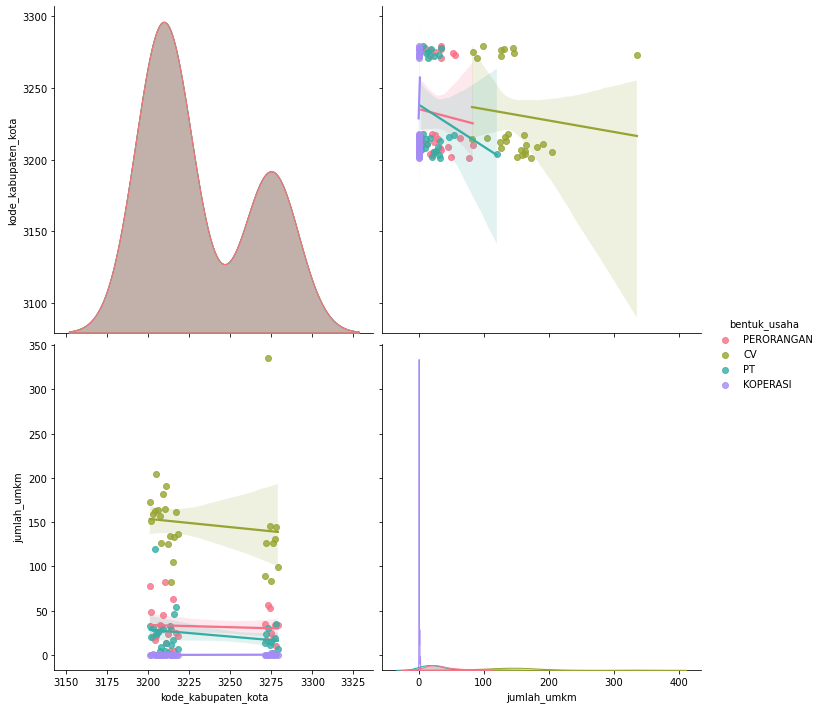

In [32]:
sns.pairplot(
    data=data, 
    vars=['kode_kabupaten_kota', 'jumlah_umkm'], 
    hue='bentuk_usaha', 
    kind='reg', 
    diag_kind='kde', 
    size=5, 
    palette='husl'
)

plt.show()

### **Pairplot Overall Data**

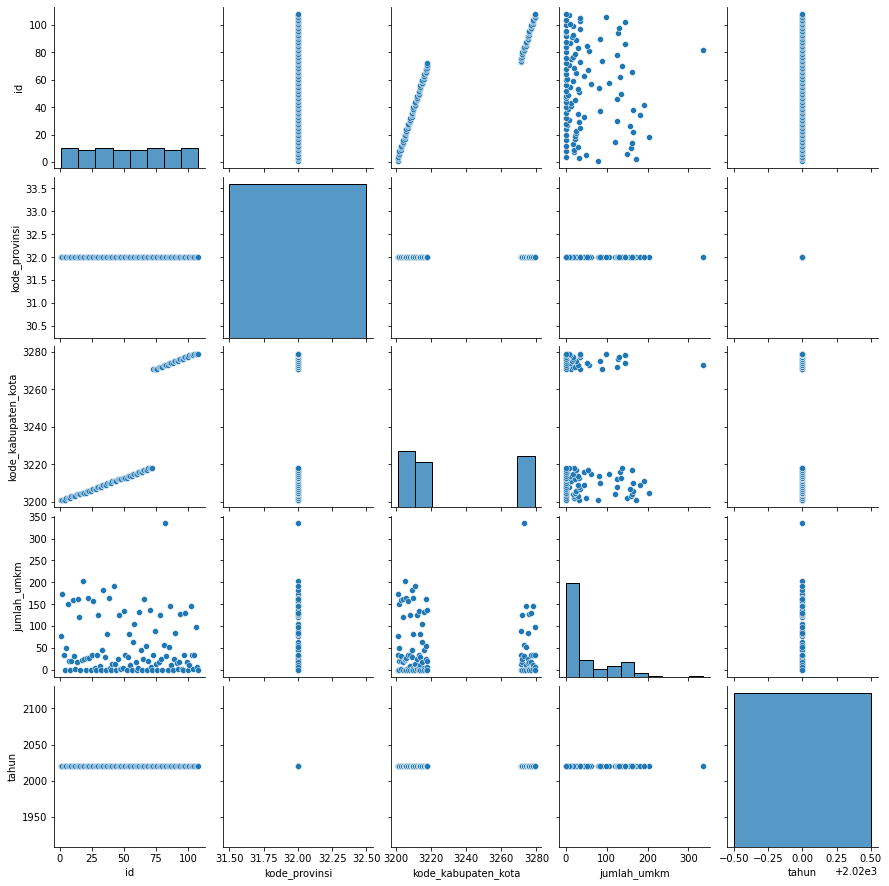

In [33]:
sns.pairplot(data)

# **Kesimpulan:**

* Data memiliki **108 baris** dan **9 kolom**.
* Data tidak memiliki nilai kosong atau **NaN**.
* Data memiliki **4 tipe object data** dan **5 tipe numeric data**.

* Data Numeric diatas memiliki 2 data yang **Skewed/Miring** yaitu **jumlah_umkm dan kode_kabupaten_kota** dan 3 data berbentuk **Normal Distribution** yaitu **kode_provinsi, id, dan tahun**.

* Data bertipe **object** memiliki frekuensi kemunculan yang sama.

Data diatas menunjukan bahwa, **Kota Bandung memiliki angka Jumlah UMKM terbanyak di tahun 2020 yaitu berjumlah 335 usaha dan usaha tersebut berbentuk CV**, disusul oleh **Kabupaten Garut dengan Jumlah 224 usaha dan usaha nya berbentuk CV**, usaha berbentuk CV dominan memiliki jumlah UMKM terbanyak, dikarenakan pendiriannya yang lebih mudah dibandingkan PT, membuat CV banyak dipilih sebagai badan usaha untuk bisnis UMKM. **Bentuk Usaha Perorangan dan PT berada di posisi kedua setelah bentuk usaha CV**. Dan yang menarik perhatian saya ialah, data **bentuk_usaha** atau data yang bertipe **Kualitatif**/**Object** memiliki jumlah frekuensi kemunculan yang sama.

# **Encoding**

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        label_encoder.fit_transform(list(data[i].values))
        data[i] = label_encoder.transform(data[i].values)
        
        for j in data.columns:
            if data[j].dtype == 'int':
                data[j] = data[j].astype('float64')

In [35]:
data, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   108 non-null    int64  
 1   kode_provinsi        108 non-null    int64  
 2   nama_provinsi        108 non-null    float64
 3   kode_kabupaten_kota  108 non-null    int64  
 4   nama_kabupaten_kota  108 non-null    float64
 5   bentuk_usaha         108 non-null    float64
 6   jumlah_umkm          108 non-null    int64  
 7   satuan               108 non-null    float64
 8   tahun                108 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 7.7 KB


(      id  kode_provinsi  nama_provinsi  kode_kabupaten_kota  nama_kabupaten_kota  bentuk_usaha  \
 0      1             32            0.0                 3201                  3.0           2.0   
 1      2             32            0.0                 3201                  3.0           0.0   
 2      3             32            0.0                 3201                  3.0           3.0   
 3      4             32            0.0                 3201                  3.0           1.0   
 4      5             32            0.0                 3202                 15.0           2.0   
 ..   ...            ...            ...                  ...                  ...           ...   
 103  104             32            0.0                 3278                 26.0           1.0   
 104  105             32            0.0                 3279                 19.0           2.0   
 105  106             32            0.0                 3279                 19.0           0.0   
 106  107 

# **Splitting Data**

In [36]:
X = data.drop(columns=['jumlah_umkm', 'id'])
y = data['jumlah_umkm']

X.shape, y.shape

((108, 7), (108,))

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.1, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 7), (11, 7), (97,), (11,))

In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

# **Model Building**

### **RandomForestRegressor**

In [39]:
pipe_random_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', RandomForestRegressor())
])

pipe_random_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', RandomForestRegressor())])

In [40]:
pred_test_rfr = pipe_random_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_rfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_rfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_rfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_rfr))

Testing R2 Score:  42.638289611031524
Testing RMSE:  72.89444504337636
Testing MAE:  29.69181818181818
Testing MSE:  5313.600118181817


### **DecisionForestRegressor**

In [41]:
pipe_decision_forest_regressor = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', DecisionTreeRegressor())
])

pipe_decision_forest_regressor.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', DecisionTreeRegressor())])

In [42]:
pred_test_dfr = pipe_decision_forest_regressor.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_dfr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_dfr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_dfr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_dfr))

Testing R2 Score:  43.08541104970997
Testing RMSE:  72.60979147595604
Testing MAE:  30.545454545454547
Testing MSE:  5272.181818181818


### **LinearRegression**

In [43]:
pipe_linear = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', LinearRegression())
])

pipe_linear.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', LinearRegression())])

In [44]:
pred_test_lr = pipe_linear.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_lr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_lr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_lr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_lr))

Testing R2 Score:  23.82542701815091
Testing RMSE:  84.00176317589778
Testing MAE:  56.652256388654024
Testing MSE:  7056.296216659615


### **KNeighborsRegressor**

In [45]:
pipe_knr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('transformer', QuantileTransformer(
        random_state=42)
    ),
    ('model', KNeighborsRegressor())
])

pipe_knr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('transformer', QuantileTransformer(random_state=42)),
                ('model', KNeighborsRegressor())])

In [46]:
pred_test_knr = pipe_knr.predict(X_test)

print('Testing R2 Score: ', r2_score(y_test, pred_test_knr)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_test_knr)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_test_knr))
print('Testing MSE: ', mean_squared_error(y_test, pred_test_knr))

Testing R2 Score:  48.24138564783178
Testing RMSE:  69.24281387066294
Testing MAE:  29.38181818181818
Testing MSE:  4794.567272727272


### **Kesimpulan**

Dikarenakan Data yang kurang memadai, accuracy model juga tidak terlalu baik, dan dikarenakan Model K-Nearest Neighbors memiliki Performa yang baik dibandingkan model yang lain, jadi saya akan memakai model K-Nearest Neighbors untuk melakukan prediksi.

# **Prediction**

In [47]:
# buat data baru
data_tahun_2021 = data.copy(deep=True)
data_tahun_2021.tahun = 2021

# delete jumlah_umkm dan id
del data_tahun_2021['jumlah_umkm']
del data_tahun_2021['id']

# predict data
jumlah_umkm_tahun_2021 = pipe_knr.predict(data_tahun_2021)

# accomodate data
data_tahun_2021['jumlah_umkm'] = jumlah_umkm_tahun_2021
data_tahun_2021['bentuk_usaha'] = data_copy['bentuk_usaha']
data_tahun_2021['nama_kabupaten_kota'] = data_copy['nama_kabupaten_kota']

# viewing data
data_tahun_2021

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bentuk_usaha,satuan,tahun,jumlah_umkm
0,32,0.0,3201,KABUPATEN BOGOR,PERORANGAN,0.0,2021,34.2
1,32,0.0,3201,KABUPATEN BOGOR,CV,0.0,2021,171.2
2,32,0.0,3201,KABUPATEN BOGOR,PT,0.0,2021,42.0
3,32,0.0,3201,KABUPATEN BOGOR,KOPERASI,0.0,2021,15.6
4,32,0.0,3202,KABUPATEN SUKABUMI,PERORANGAN,0.0,2021,16.2
...,...,...,...,...,...,...,...,...
103,32,0.0,3278,KOTA TASIKMALAYA,KOPERASI,0.0,2021,2.2
104,32,0.0,3279,KOTA BANJAR,PERORANGAN,0.0,2021,33.4
105,32,0.0,3279,KOTA BANJAR,CV,0.0,2021,117.4
106,32,0.0,3279,KOTA BANJAR,PT,0.0,2021,14.8


### **Nama Kabupaten dan Kota manakah yang diprediksi akan memiliki Jumlah UMKM terbanyak di tahun 2021?**

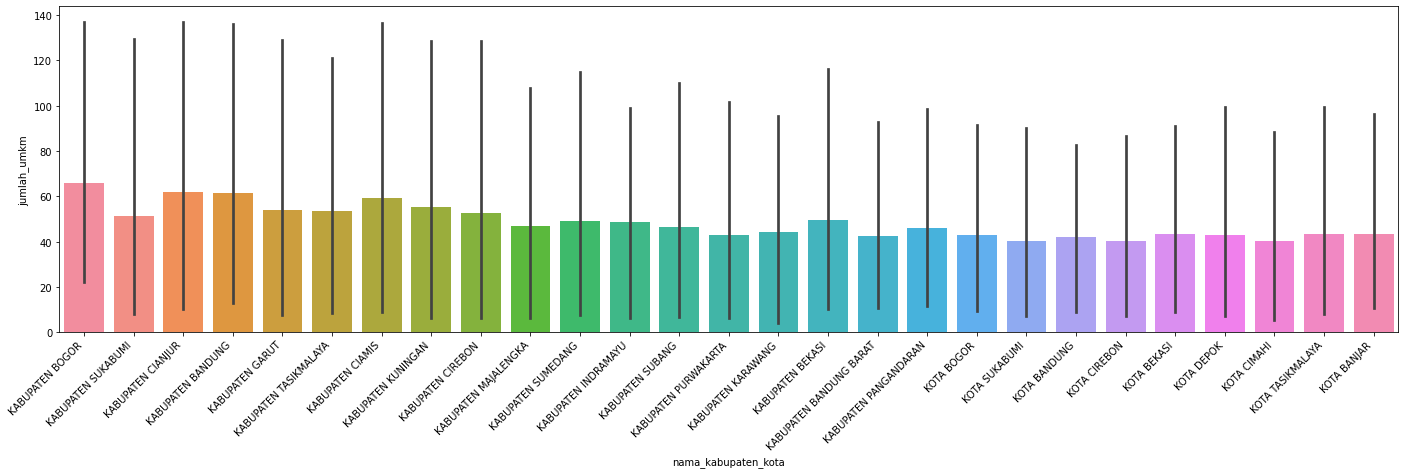

In [48]:
plt.figure(figsize=(24, 6))

viz = sns.barplot(
    x='nama_kabupaten_kota', 
    y='jumlah_umkm', 
    data=data_tahun_2021,  
    saturation=0.90
)

viz.set_xticklabels(
    viz.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

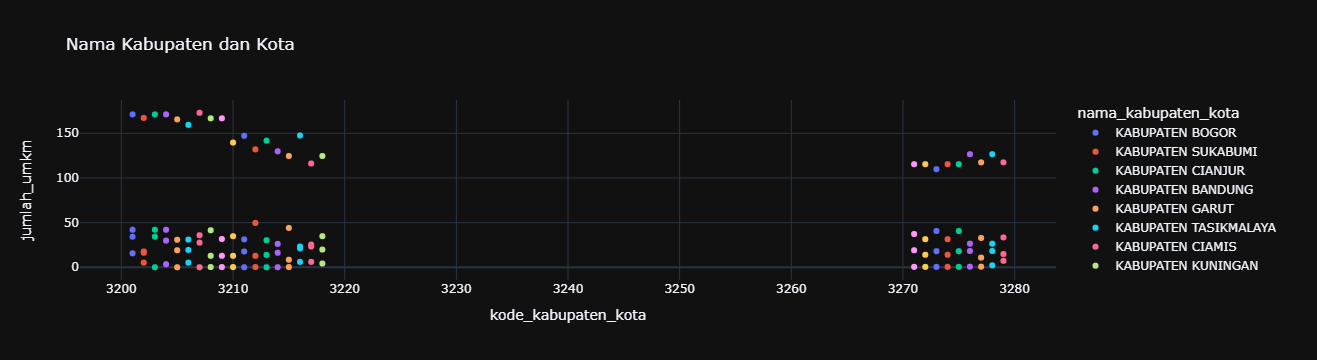

In [49]:
bivariate_visualization_scatter(
    data=data_tahun_2021,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='nama_kabupaten_kota',
    title='Nama Kabupaten dan Kota'
)

> Kabupaten diprediksi akan mengalami kenaikan **Jumlah UMKM** dibandingkan **Kota**.

### **Bentuk Usaha manakah yang memiliki Jumlah UMKM terbanyak di tahun 2021?**

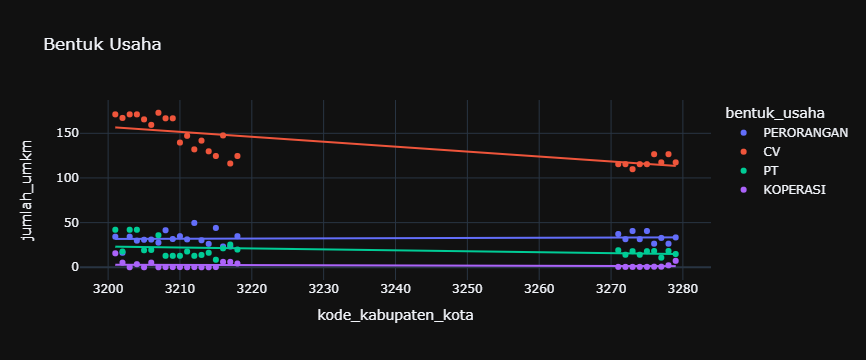

In [50]:
bivariate_visualization_scatter(
    data=data_tahun_2021,
    y='jumlah_umkm',
    x='kode_kabupaten_kota',
    color='bentuk_usaha',
    title='Bentuk Usaha'
)

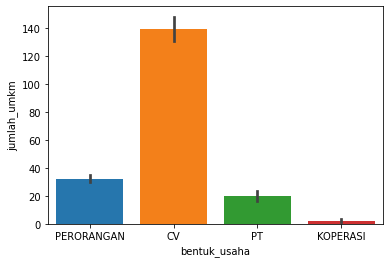

In [51]:
sns.barplot(
    x='bentuk_usaha', 
    y='jumlah_umkm', 
    data=data_tahun_2021,  
    saturation=0.90
)

plt.show()

> Bentuk Usaha yang memiliki **Jumlah UMKM** terbanyak di tahun 2021 adalah bentuk usaha **CV**.

### **Kesimpulan:**

Hasil prediksi di Tahun 2021, diperkirakan Jumlah UMKM di Kota Bandung Menurun, dari 335 usaha menjadi 109.8 usaha berbentuk CV, dan Kabupaten Ciamis memiliki Jumlah UMKM berbentuk CV tertinggi, yaitu 173 usaha, tetapi jika dilihat. Jumlah UMKM dalam data tahun 2020 menunjukkan data prediksi tahun 2021 mengalami 2x lipat penurunan Jumlah UMKM. 

In [52]:
del data_copy['id']

data_copy

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bentuk_usaha,jumlah_umkm,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,PERORANGAN,78,UNIT,2020
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,CV,173,UNIT,2020
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PT,33,UNIT,2020
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,KOPERASI,0,UNIT,2020
4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PERORANGAN,49,UNIT,2020
...,...,...,...,...,...,...,...,...
103,32,JAWA BARAT,3278,KOTA TASIKMALAYA,KOPERASI,1,UNIT,2020
104,32,JAWA BARAT,3279,KOTA BANJAR,PERORANGAN,34,UNIT,2020
105,32,JAWA BARAT,3279,KOTA BANJAR,CV,99,UNIT,2020
106,32,JAWA BARAT,3279,KOTA BANJAR,PT,7,UNIT,2020


In [53]:
data_tahun_2021['nama_provinsi'] = data_copy['nama_provinsi']

data_tahun_2021['satuan'] = data_copy['satuan']

data_tahun_2021

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bentuk_usaha,satuan,tahun,jumlah_umkm
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,PERORANGAN,UNIT,2021,34.2
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,CV,UNIT,2021,171.2
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PT,UNIT,2021,42.0
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,KOPERASI,UNIT,2021,15.6
4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PERORANGAN,UNIT,2021,16.2
...,...,...,...,...,...,...,...,...
103,32,JAWA BARAT,3278,KOTA TASIKMALAYA,KOPERASI,UNIT,2021,2.2
104,32,JAWA BARAT,3279,KOTA BANJAR,PERORANGAN,UNIT,2021,33.4
105,32,JAWA BARAT,3279,KOTA BANJAR,CV,UNIT,2021,117.4
106,32,JAWA BARAT,3279,KOTA BANJAR,PT,UNIT,2021,14.8


In [54]:
data_umkm_bentuk_usaha_tahun_2021 = pd.concat([data_copy, data_tahun_2021], ignore_index=True)

data_umkm_bentuk_usaha_tahun_2021_copy = data_umkm_bentuk_usaha_tahun_2021.copy(deep=True)

data_umkm_bentuk_usaha_tahun_2021

,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,bentuk_usaha,jumlah_umkm,satuan,tahun
0,32,JAWA BARAT,3201,KABUPATEN BOGOR,PERORANGAN,78.0,UNIT,2020
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,CV,173.0,UNIT,2020
2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PT,33.0,UNIT,2020
3,32,JAWA BARAT,3201,KABUPATEN BOGOR,KOPERASI,0.0,UNIT,2020
4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PERORANGAN,49.0,UNIT,2020
...,...,...,...,...,...,...,...,...
211,32,JAWA BARAT,3278,KOTA TASIKMALAYA,KOPERASI,2.2,UNIT,2021
212,32,JAWA BARAT,3279,KOTA BANJAR,PERORANGAN,33.4,UNIT,2021
213,32,JAWA BARAT,3279,KOTA BANJAR,CV,117.4,UNIT,2021
214,32,JAWA BARAT,3279,KOTA BANJAR,PT,14.8,UNIT,2021


In [55]:
data_umkm_bentuk_usaha_tahun_2021.to_csv('data_umkm_bentuk_usaha_tahun_2021.csv', index=False)